In [1]:
import nltk
nltk.download('wordnet')

##from google.colab import files
#uploaded = files.upload()

[nltk_data] Downloading package wordnet to /home/maad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score
import seaborn as sns
import sklearn

In [3]:
df = pd.read_excel("AllCombineDataVersion2.xlsx", sheet_name=None, ignore_index=True, sort=True)
data = pd.concat(df.values(), ignore_index=True, sort=False)

In [4]:
data.isna().sum()

Unnamed: 0            0
Tag                   0
Tweet_text            0
Unnamed: 0.1          0
Unnamed: 0.1.1    23090
dtype: int64

In [5]:
data['Tag'].value_counts()

PT    7426
WB    5386
ST    4148
EN    3902
ED    3848
SP    3356
SI    3320
HT    2939
BN    2927
RE    2847
GM    2616
NW     713
Name: Tag, dtype: int64

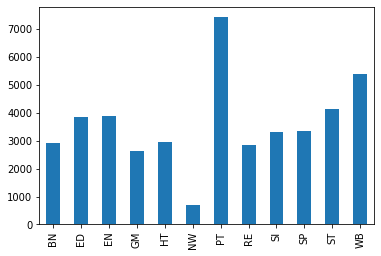

In [6]:
data['Tag'].value_counts().sort_index().plot.bar()

In [7]:
data['Tag'].describe()

count     43428
unique       12
top          PT
freq       7426
Name: Tag, dtype: object

In [8]:
data.head()

Unnamed: 0 Tag                                         Tweet_text  \
0           0  BN  RT @AndrewYNg: Right now economists are debati...   
1           1  WB  An investment in knowledge pays the best inter...   
2           2  BN  RT @IMustajabgohar: Sino Tires to Invest $600 ...   
3           3  PT  RT @IKLover1992: 22 Years struggle has finally...   
4           4  BN  RT @insaafian92107: Trade deficit dips 14pc to...   

   Unnamed: 0.1  Unnamed: 0.1.1  
0             0             NaN  
1             1             NaN  
2             2             NaN  
3             3             NaN  
4             4             NaN

In [9]:
data.shape

(43428, 5)

In [10]:
my_tags = ['ST', 'PT', 'HT', 'BN', 'ED', 'SP', 'EN', 'SI', 'RE', 'GM', 'NW', 'WB']

In [11]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text_to_preprocess):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text_to_preprocess, pos='v'))

def preprocess(text_to_preprocess):
    result = []
    for token in gensim.utils.simple_preprocess(text_to_preprocess):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return " ".join(result)

In [12]:
data['Tweet_text'] = data['Tweet_text'].map(preprocess)


In [13]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(data['Tweet_text'], data['Tag'], stratify=data['Tag'],random_state = 0)

In [14]:
print("train_x shape",train_x.shape)
print("train_y shape",train_y.shape)
print("test_x shape",test_x.shape)
print("test_y shape",test_y.shape)

train_x shape (32571,)
train_y shape (32571,)
test_x shape (10857,)
test_y shape (10857,)


In [15]:
col=['Tag']
train_y = pd.DataFrame(train_y)
train_y['Tag'].value_counts()

PT    5570
WB    4040
ST    3111
EN    2926
ED    2886
SP    2517
SI    2490
HT    2204
BN    2195
RE    2135
GM    1962
NW     535
Name: Tag, dtype: int64

In [16]:
col=['Tag']
test_y = pd.DataFrame(test_y)
test_y['Tag'].value_counts()

PT    1856
WB    1346
ST    1037
EN     976
ED     962
SP     839
SI     830
HT     735
BN     732
RE     712
GM     654
NW     178
Name: Tag, dtype: int64

In [17]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y.values)
test_y = encoder.fit_transform(test_y.values)

/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maad/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(data['Tweet_text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [19]:
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xtest_count =  count_vect.transform(test_x)

In [20]:
def train_model(clf, x_train, y_train, x_test, y_test, verbose=False):
    clf = clf.fit(x_train, y_train)    
    pred = clf.predict(x_test)    
    
    if verbose:
        tweet = "Amir took 5 wicket in yesterday 20 20 match at national stadium"
        print("Predicting tweet: {}".format(tweet))
        custom_pred = clf.predict(count_vect.transform([tweet]))
        print("Result: {}".format(encoder.inverse_transform(custom_pred)))
    
    return metrics.accuracy_score(pred, y_test)

In [21]:
def formatAccuracy(acc):
    return round(acc*100, 3)

In [22]:
print ("~ Using Naive Bayes ~ ")
NBModel = naive_bayes.MultinomialNB(alpha=2.6)
accuracyNB = train_model(NBModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyNB)))
NBModel = NBModel.fit(xtrain_count, train_y) 
pred = NBModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))

print('Training acc : ',accuracy_score(train_y, NBModel.predict(xtrain_count)))
print(classification_report(test_y, pred,target_names=my_tags))
print("Confusion Matrix \n",confusion_matrix(test_y, pred))

~ Using Naive Bayes ~ 
Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['SP']
Accuracy: 76.126%
roc_auc_score : 0.8387099858434928
Training acc :  0.8195020109913727
              precision    recall  f1-score   support

          ST       0.89      0.75      0.81       732
          PT       0.73      0.56      0.63       962
          HT       0.85      0.76      0.80       976
          BN       0.88      0.82      0.85       654
          ED       0.93      0.83      0.87       735
          SP       0.33      0.01      0.01       178
          EN       0.69      0.96      0.80      1856
          SI       0.92      0.85      0.89       712
          RE       0.73      0.47      0.57       830
          GM       0.92      0.89      0.90       839
          NW       0.73      0.83      0.78      1037
          WB       0.56      0.67      0.61      1346

    accuracy                           0.76     10857
   macro avg       0.76      0.70 

In [23]:
#SVC
print()
print ("~ Using Linear SVC ~ ")
SVCModel = svm.LinearSVC(C=0.001)
accuracySVC = train_model(SVCModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
SVCModel = SVCModel.fit(xtrain_count, train_y) 
pred = SVCModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print('Training acc : ',accuracy_score(train_y, SVCModel.predict(xtrain_count)))
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Linear SVC ~ 
Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['SP']
Accuracy: 75.785%
roc_auc_score : 0.8387731637758816
Training acc :  0.7723434957477511
              precision    recall  f1-score   support

          ST       0.88      0.75      0.81       732
          PT       0.74      0.62      0.67       962
          HT       0.84      0.74      0.79       976
          BN       0.88      0.82      0.85       654
          ED       0.93      0.89      0.91       735
          SP       0.33      0.01      0.01       178
          EN       0.72      0.93      0.81      1856
          SI       0.88      0.86      0.87       712
          RE       0.81      0.50      0.62       830
          GM       0.94      0.85      0.90       839
          NW       0.69      0.77      0.73      1037
          WB       0.51      0.67      0.58      1346

    accuracy                           0.76     10857
   macro avg       0.76      0.70 

In [24]:
import numpy as np
feature_names = np.array(count_vect.get_feature_names())
sorted_coef_index = SVCModel.coef_[0].argsort()
print("Smallest Coefs:\n{}\n".format(feature_names[sorted_coef_index[:10]]))
print("Largest Coefs:\n{}\n".format(feature_names[sorted_coef_index[:11:-1]]))
print("")

Smallest Coefs:
['comput' 'diseas' 'machin' 'educ' 'cloud' 'intellig' 'thing' 'entertain'
 'health' 'sport']

Largest Coefs:
['busi' 'segment' 'market' ... 'secur' 'internet' 'aifici']




In [25]:
import pickle
with open("Linear_SVC_pickle",'wb') as f:
    pickle.dump(SVCModel,f)
    

In [26]:
#LR
print()
print ("~ Using Logistic Regression ~ ")
LRModel = linear_model.LogisticRegression(C=0.01,penalty='l2' ,solver='lbfgs', multi_class='multinomial')
accuracySVC = train_model(LRModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
LRModel = LRModel.fit(xtrain_count, train_y) 
pred = LRModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print('Training acc : ', accuracy_score(train_y, LRModel.predict(xtrain_count)))
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Logistic Regression ~ 
Predicting tweet: Amir took 5 wicket in yesterday 20 20 match at national stadium
Result: ['SP']
Accuracy: 74.68%
roc_auc_score : 0.8319477079858428
Training acc :  0.7645451475238709
              precision    recall  f1-score   support

          ST       0.90      0.72      0.80       732
          PT       0.76      0.61      0.67       962
          HT       0.84      0.73      0.78       976
          BN       0.95      0.79      0.86       654
          ED       0.95      0.86      0.90       735
          SP       0.12      0.03      0.05       178
          EN       0.75      0.92      0.83      1856
          SI       0.91      0.81      0.86       712
          RE       0.83      0.50      0.62       830
          GM       0.96      0.82      0.89       839
          NW       0.68      0.72      0.70      1037
          WB       0.46      0.74      0.56      1346

    accuracy                           0.75     10857
   macro avg       0.76   